In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train)


170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
y_train_new=np.squeeze(y_train,axis=1)
y_test_new=np.squeeze(y_test,axis=1)
print(y_train_new.shape)
print(y_train_new)

(50000,)
[6 9 9 ... 9 1 1]


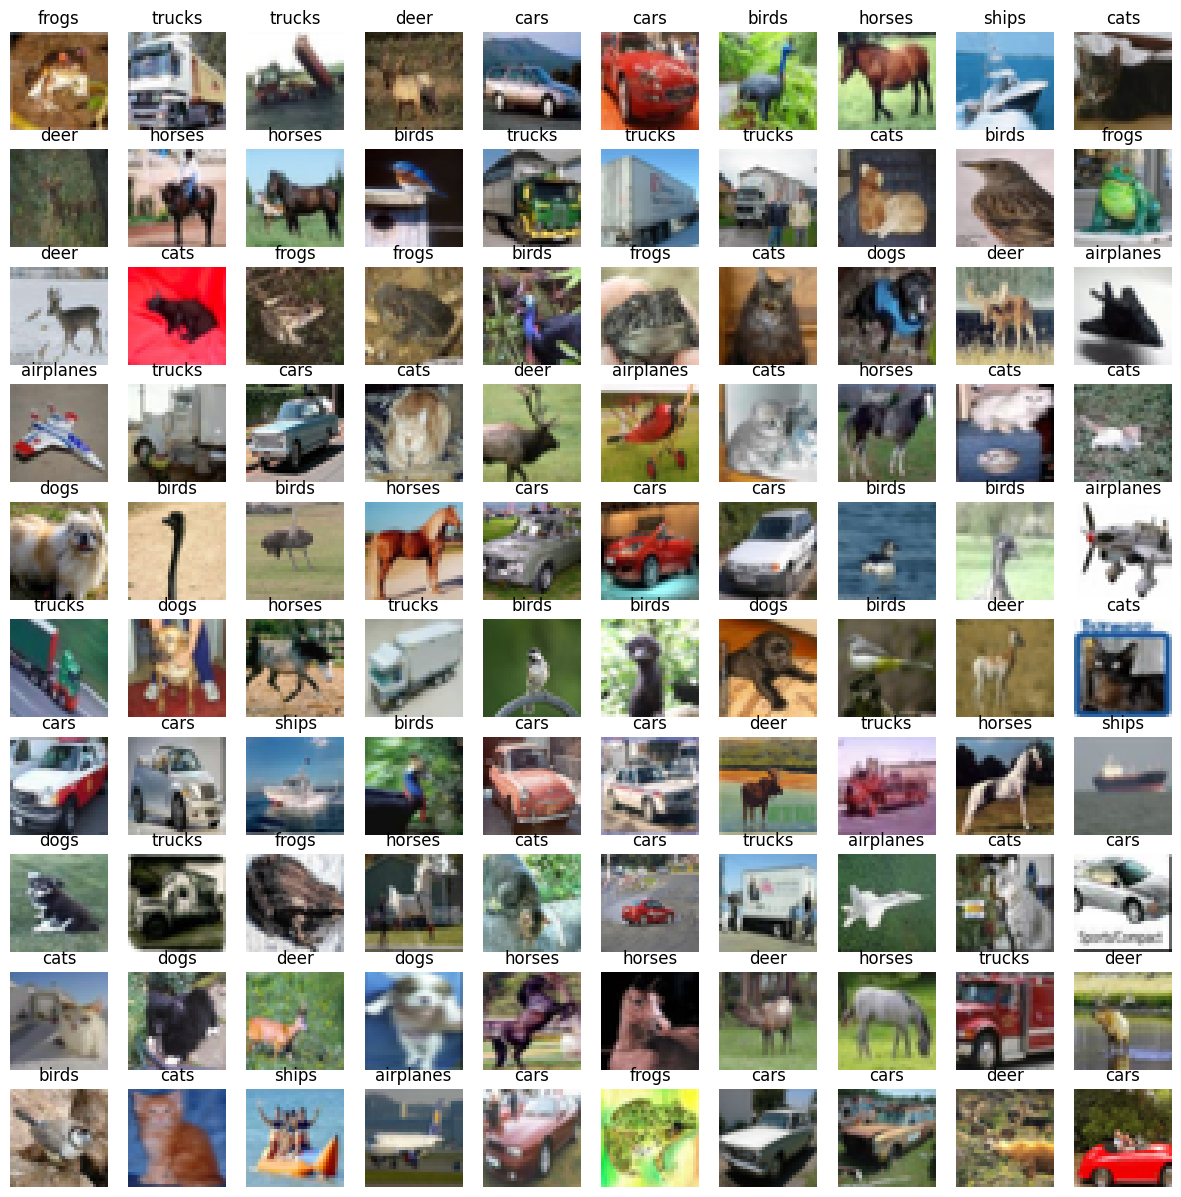

In [ ]:
class_labels=['airplanes','cars','birds','cats','deer','dogs','frogs','horses','ships','trucks']
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(class_labels[y_train_new[i]])

In [ ]:
#preprocessing
x_train=x_train/255
x_test=x_test/255

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [ ]:
model.compile(optimizer="rmsprop", loss ="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist=model.fit(x_train,y_train_new,batch_size=32,epochs=5,verbose=1,validation_split=.3)

Epoch 1/5
1094/1094 [==============================] - 161s 146ms/step - loss: 1.5002 - accuracy: 0.4821 - val_loss: 1.4489 - val_accuracy: 0.5199
Epoch 2/5
1094/1094 [==============================] - 160s 146ms/step - loss: 1.0463 - accuracy: 0.6375 - val_loss: 1.1565 - val_accuracy: 0.6113
Epoch 3/5
1094/1094 [==============================] - 180s 165ms/step - loss: 0.8763 - accuracy: 0.7024 - val_loss: 2.0927 - val_accuracy: 0.4202
Epoch 4/5
1094/1094 [==============================] - 232s 212ms/step - loss: 0.7307 - accuracy: 0.7490 - val_loss: 1.6871 - val_accuracy: 0.6131
Epoch 5/5
1094/1094 [==============================] - 165s 151ms/step - loss: 0.6178 - accuracy: 0.7906 - val_loss: 1.5737 - val_accuracy: 0.6173


In [ ]:
model.save("model_saved")

In [ ]:
reloaded_model=tf.keras.models.load_model('model_saved')

In [ ]:
dict=hist.history
dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

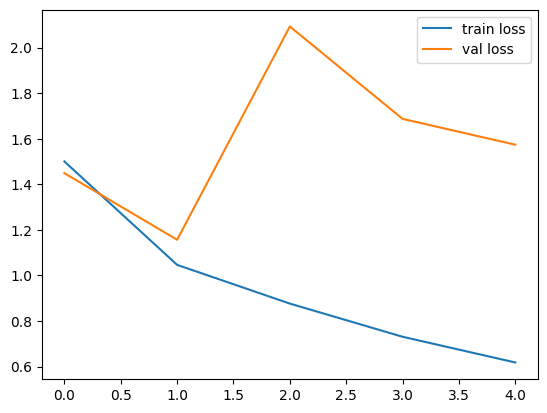

In [ ]:
plt.plot(dict['loss'],label='train loss')
plt.plot(dict['val_loss'],label='val loss')
plt.legend()


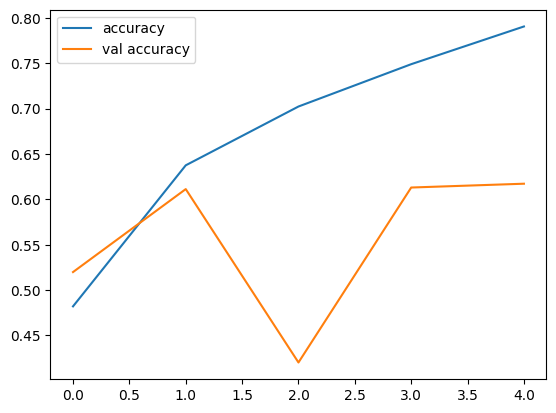

In [ ]:
plt.plot(dict['accuracy'],label='accuracy')
plt.plot(dict['val_accuracy'],label='val accuracy')
plt.legend()

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 9s 29ms/step


In [ ]:
print(y_test_new[0])
print(y_pred[0])
print(np.argmax(y_pred[0]))

3
[1.9549294e-05 7.5622751e-08 2.2535763e-05 9.8782563e-01 2.0339886e-08
 1.1986193e-02 1.4452635e-04 7.8725265e-08 1.1475697e-06 8.8945256e-08]
3


In [ ]:

y_label=np.argmax(y_pred,axis=1)
print(y_label)

[3 8 8 ... 5 1 7]


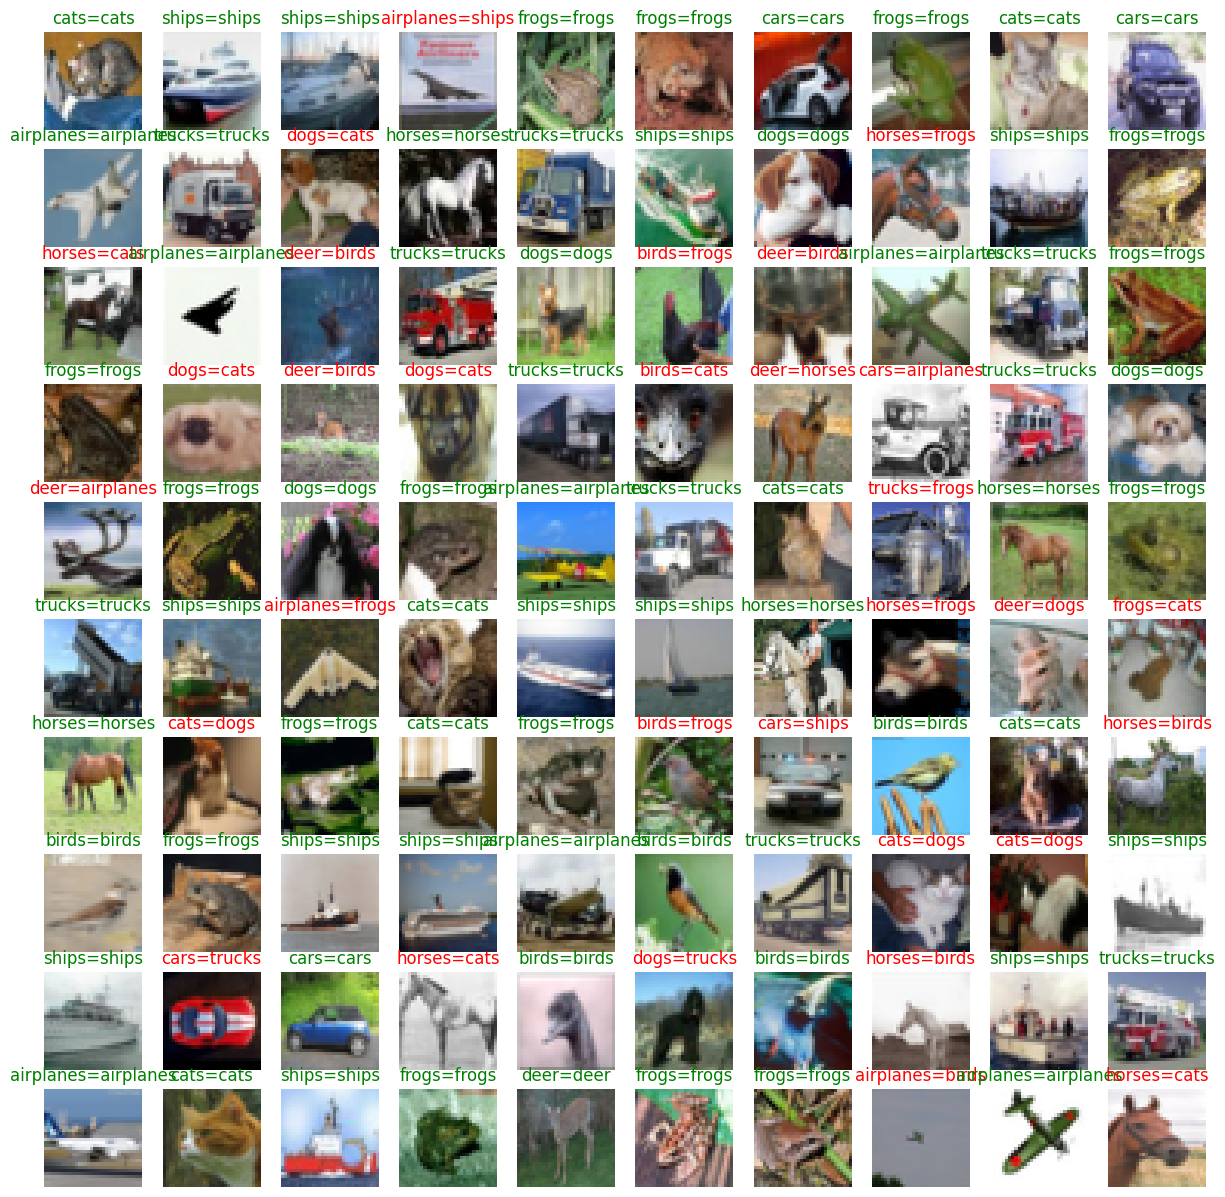

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  if y_test_new[i] == y_label[i]:
    plt.title(class_labels[y_test_new[i]]+'='+class_labels[y_label[i]],c='g')
  else:
    plt.title(class_labels[y_test_new[i]]+'='+class_labels[y_label[i]],c='r')

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test_new)
print(test_acc)

313/313 [==============================] - 11s 34ms/step - loss: 1.5681 - accuracy: 0.6178
0.6177999973297119


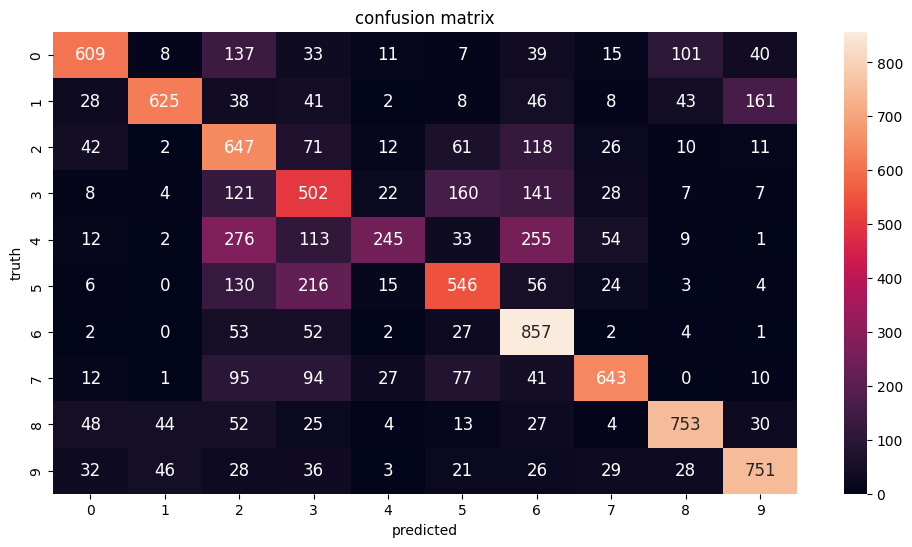

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_label)
plt.figure(figsize=[12,6])
import seaborn as sn
sn.heatmap(cm,annot=True,fmt="d",annot_kws={"size":12})
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()